<a href="https://colab.research.google.com/github/anitadala/Basic-Sentiment-Analysis/blob/master/Copy_of_basic_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
print(x_train[0])
#the words of the first review are shown here converted into numbers(tokens) as NN only understands numbers

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
print(y_train[0])    
# 1 represents positive review and 0 represents a negative review

1


In [0]:
class_names = ['Negative','Positive']


In [0]:
word_index = imdb.get_word_index()
print(word_index['good'])
#word_index is a dictionary (key,value_pair) which stores the token values of the words of any review

1646592/1641221 [==============================] - 0s 0us/step
49


In [0]:
#DECODING THE REVIEWS
#decode the numeric tokens back to the text words
reverse_word_index = dict((value,key) for key,value in word_index.items())
#define a function which will help us to decode the reviews
def decode(review):
  #its going to be a list of numbers
  text = ''
  for i in review:
    text += reverse_word_index[i]
    text +=' '
  return text

In [0]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
# we can see that the length of every review is going to be different so lets make a function to show length of the review
def show_len():
  print("The length of first training example is: ", len(x_train[0]))
  print("The length of second training example is: ", len(x_train[1]))
  print("The length of first test example is: ",len(x_test[0]))
  print("The length of second test example is: ", len(x_test[0]))

show_len()

The length of first training example is:  218
The length of second training example is:  189
The length of first test example is:  68
The length of second test example is:  68


In [0]:
#PADDING THE REVIEWS: As we know that all the reviews are not of the same length
#So we are going to pad our reviews with useless words which do not contribute to 
#results of the review like use of 'a','an','the' etc for padding the shorter reviews 
#to reach the same length of 256 
#word_index['the']= 1 ---->(value = 1 ) can also be used
#keras provides an inbuilt function for padding like this 'pad_sequences'
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train,value = word_index['the'],padding= 'post',maxlen = 256)
x_test = pad_sequences(x_test,value = word_index['the'],padding= 'post',maxlen = 256)



In [0]:
#lets see the reviews lengths now
show_len()
#done,all padded to 256 length

The length of first training example is:  256
The length of second training example is:  256
The length of first test example is:  256
The length of second test example is:  256


In [0]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
#word embeddings: so that the training model can extrapolate words in between lines 
#if we give it a slight variation in  the review.Tensorflow will be having a embedding layer
#to provide this type of feature


# TRAINING THE MODEL
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Embedding , GlobalAveragePooling1D

model = Sequential ([
                     Embedding(10000,16),
                     GlobalAveragePooling1D(),
                     Dense(16,activation = 'relu'),
                     Dense(1,activation = 'sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
#as we can see our model is having 4 layers,perfectly done
#lets TRAIN OUR MODEL

from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l : print(e,end='.'))

E = 20

h = model.fit(
    x_train,y_train,
    validation_split = 0.2,
    epochs = E,
    verbose = False,
    callbacks = [simple_log]
    
)


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

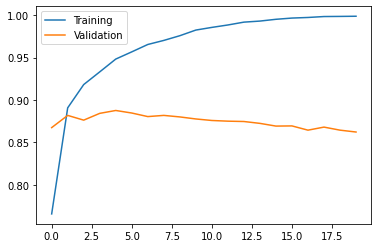

In [0]:
#training of the model is complete,
#lets move on to PREDICTIONS AND EVALUATION Of our model
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E),h.history['accuracy'],label = 'Training')
plt.plot(range(E),h.history['val_accuracy'],label = 'Validation')
plt.legend()
plt.show()
#as we can see the tarining accuracy is starting from 0 whereas the vlaidation 
#accuracy begins with almose 85% which is kind of decreasing towards the end because 
#the accuracy on the validation set is kindof the overfitting has came,so lets remove the overfitting in the next cell

In [0]:
loss,acc = model.evaluate(x_test,y_test)
print('test_set_accuracy =',acc*100) 

782/782 [==============================] - 1s 1ms/step - loss: 1.1259 - accuracy: 0.8353
test_set_accuracy = 83.5319995880127


In [0]:
import numpy as np
#lets check the first review :whether it is a positive one or a negative
p = model.predict(np.expand_dims(x_test[0],axis = 0))
print(class_names[np.argmax(p[0])])

Negative


In [0]:
#lets check manually the first test review
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

In [0]:
#this project is complete with 83.6% accuracy on test sets.we have use 2 Dense layers and one embedded layer to train our model 